- # Ant Colony Optimization Applied to Travelling Salesman Problem

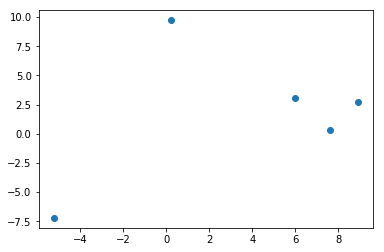

In [2]:
import pants
import math
import random
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt


nodes = []
n=5 #no. of cities
for i in range(n):
  x = random.uniform(-10, 10)
  y = random.uniform(-10, 10)
  nodes.append((x, y))
  
#nodes = ((0,0),(0,3),(4,0),(4,3), (5,2))
testList = nodes
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
#plt.plot(*zip(*testList2))
plt.scatter(*zip(*testList2))
plt.show()

- # Brute force solution

In [3]:
def euclidean(a, b):
    return math.sqrt(   (a[1] - b[1])**2 + (a[0] - b[0])**2  )

47.12333861442848
((-5.216695877997443, -7.20713201528536), (0.2238211881361707, 9.708625314563093), (5.972492009031228, 3.0735529167755047), (8.911694286458975, 2.7378979688245604), (7.6080865046332065, 0.3215912653375863))


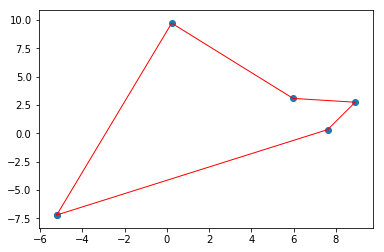

Wall time: 191 ms


In [4]:
%%time
perm = permutations(nodes)
b = list(perm)

min = 99999
short = 0
for i in range(math.factorial(n)):
    dist=0
    for j in range(n):
        dist = dist + euclidean(b[i][j%n], b[i][(j+1)%n])
    if (dist < min):
        min = dist
        short = i
print(min)
print(b[short])

bf_path=[]
for i in range(n):
    bf_path.append(b[short][i])
bf_path.append(b[short][0])


testList = bf_path
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
plt.plot(*zip(*testList2), 'r', lw=1)
plt.scatter(*zip(*testList2))
plt.show()

- # Ant colony optimization solution

47.12333861442848
[(0.2238211881361707, 9.708625314563093), (5.972492009031228, 3.0735529167755047), (8.911694286458975, 2.7378979688245604), (7.6080865046332065, 0.3215912653375863), (-5.216695877997443, -7.20713201528536), (0.2238211881361707, 9.708625314563093)]


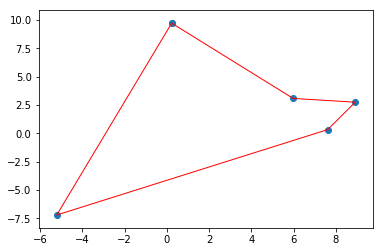

Wall time: 275 ms


In [5]:
%%time
world = pants.World(nodes, euclidean)
solver = pants.Solver()
solution = solver.solve(world)

path=[]
for i in range(n):
    path.append(solution.tour[i])
path.append(solution.tour[0])

print(solution.distance)
print(path)

testList = path
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
plt.plot(*zip(*testList2), 'r', lw=1)
plt.scatter(*zip(*testList2))
plt.show()
